# How AI is impacting Software Engineering Jobs

## Goals

- Are AI tools, such as Chat GPT, impacting Software Engineering jobs?

- Has the amount of job openings increased / decreased / stayed the same?

# Hypothesis

- Seasonal
    - I think companies hire more at the start of the year, and it may fluctuate throughout the year

- Short-term
    - I don't think AI will reduce the need for software engineers in its current state (a human is still required to piece things together)

- Long-term
    - Perhaps AI tools will improve and the entry level software engineer jobs will be less available

## Approach
- Metric
    - The number of job openings over time

- Test
    - If it has changed after a certain point in time (when AI became more widely adopted)

- Decide on what to comparison against
    - A trend
    - Other job categories that are plausibly unaffected by AI
    - Pre-post AI comparison

- Find Data
    - Pinpoint when AI became a bigger topic
    - Find recent dataset from which we can see job openings in a given time period + what we're comparing against

## ChatGPT release date

- Chat GPT, released **30th November 2022** ([Source](https://en.wikipedia.org/wiki/ChatGPT#:~:text=by%20OpenAI%20and-,launched%20on%20November%2030%2C%202022,-.%20Based%20on%20a))

## Dataset: FRED - Federal Reserve Bank of St. Louis

[Software Development Job Postings on Indeed - United States](https://fred.stlouisfed.org/series/IHLIDXUSTPSOFTDEVE)
- This dataset is limited to job postings on [Indeed](https://uk.indeed.com)
- The units are **"Index Feb, 1 2020=100, Seasonally Adjusted**"
    - This means that `100` is the value it was on Feb 1 2020, and all values are relative to point in time
    - Sesonally Adjusted means it will take an average to remove peaks and troughs

In [20]:
import pandas as pd

raw_data = pd.read_csv(
    "./datasets/fred-software-development-jobs-indeed-us.csv", 
    parse_dates=[0],
    index_col=0
)

df = pd.DataFrame(raw_data)

df.head

<bound method NDFrame.head of             IHLIDXUSTPSOFTDEVE
DATE                          
2020-02-01              100.00
2020-02-02               99.75
2020-02-03               99.55
2020-02-04               99.29
2020-02-05               99.22
...                        ...
2024-01-01               73.82
2024-01-02               73.58
2024-01-03               73.40
2024-01-04               73.29
2024-01-05               73.07

[1435 rows x 1 columns]>

In [3]:
# Update column names
(
    df
    .rename(columns={"IHLIDXUSTPSOFTDEVE":"index"})
    .rename_axis('date')
)

,index
date,
2020-02-01,100.00
2020-02-02,99.75
2020-02-03,99.55
2020-02-04,99.29
2020-02-05,99.22
...,...
2024-01-01,73.82
2024-01-02,73.58
2024-01-03,73.40


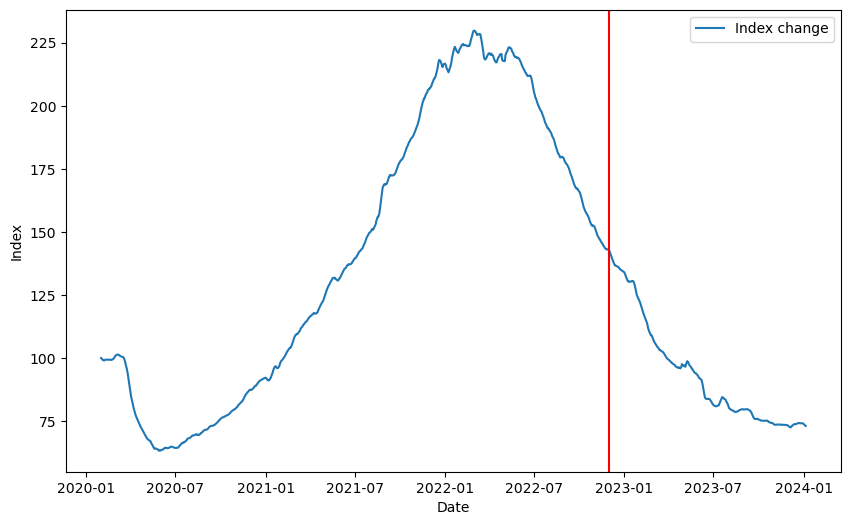

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df, label="Index change")

# Add a line for the date when Chat GPT was released
plt.axvline(pd.Timestamp('2022-11-30'),color='r')

plt.xlabel("Date")
plt.ylabel("Index")
plt.legend()
plt.show()

The peek around 2022 might be due to hiring during Covid-19

## Dataset: Nomis - Official Census and Labour Market Statistics

Nomis has a [Employment by occupation by sex](https://www.nomisweb.co.uk/datasets/aps218/reports/employment-by-occupation?compare=K02000001) dataset

In [34]:
nomis_data = pd.read_csv(
    "./datasets/employment-by-sex.csv", 
    parse_dates=[0],
    index_col=0
)

nomis_df = pd.DataFrame(nomis_data)

nomis_df

,United Kingdom
Date,
2021-12-01,454100
2021-03-01,469000
2021-06-01,472200
2021-09-01,491300
2022-12-01,512600
2022-03-01,563800
2022-06-01,584500
2022-09-01,603300


In [35]:
(
    nomis_df
    .rename(columns={"United Kingdom":"software_engineers"})
    .rename_axis('date')
)

,software_engineers
date,
2021-12-01,454100
2021-03-01,469000
2021-06-01,472200
2021-09-01,491300
2022-12-01,512600
2022-03-01,563800
2022-06-01,584500
2022-09-01,603300


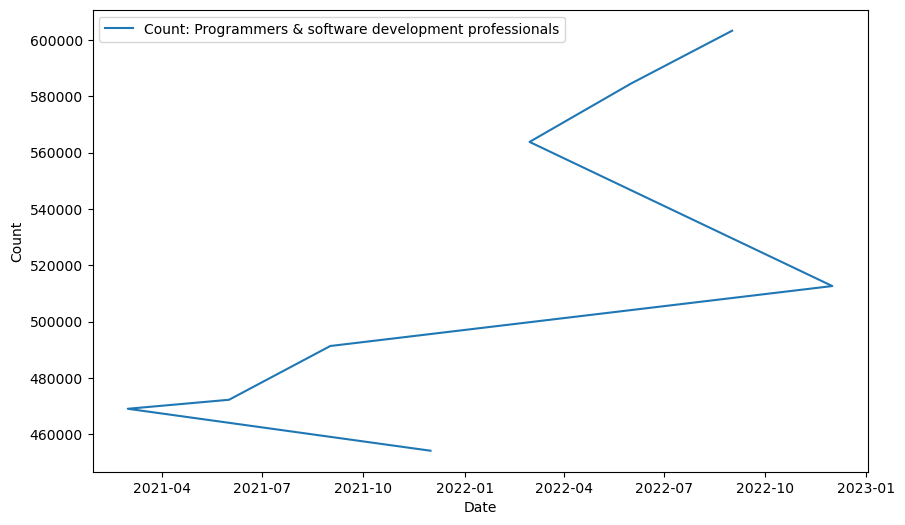

In [37]:
plt.figure(figsize=(10,6))
plt.plot(nomis_df, label="Count: Programmers & software development professionals")

# Add a line for the date when Chat GPT was released
# plt.axvline(pd.Timestamp('2022-11-30'),color='r')

plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

It seems I may need to resample my dataframe to fill the date gaps?